# # RDD operations

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import os
print(os.environ['SPARK_HOME'])
#print(os.environ['JAVA_HOME'])

/opt/spark


In [3]:
import findspark

In [4]:
findspark.find()

'/home/shashank/env/lib/python3.8/site-packages/pyspark'

In [5]:
from pyspark import SparkContext, SparkConf

In [6]:
from pyspark.sql import SparkSession

In [7]:
conf = SparkConf().setAppName("newApp").setMaster("local")

In [9]:
sc = SparkContext(conf=conf).getOrCreate()

22/03/21 10:29:34 WARN Utils: Your hostname, shashank resolves to a loopback address: 127.0.1.1; using 192.168.0.108 instead (on interface wlp3s0)
22/03/21 10:29:34 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/21 10:29:36 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [11]:
sc.stop()

In [140]:
spark.stop()

In [13]:
sc.getConf().get('spark.eventLog.dir')

In [12]:
data = sc.textFile('data.csv',use_unicode=True)
data.take(2)

[',ID,Name,Age,Photo,Nationality,Flag,Overall,Potential,Club,Club Logo,Value,Wage,Special,Preferred Foot,International Reputation,Weak Foot,Skill Moves,Work Rate,Body Type,Real Face,Position,Jersey Number,Joined,Loaned From,Contract Valid Until,Height,Weight,LS,ST,RS,LW,LF,CF,RF,RW,LAM,CAM,RAM,LM,LCM,CM,RCM,RM,LWB,LDM,CDM,RDM,RWB,LB,LCB,CB,RCB,RB,Crossing,Finishing,HeadingAccuracy,ShortPassing,Volleys,Dribbling,Curve,FKAccuracy,LongPassing,BallControl,Acceleration,SprintSpeed,Agility,Reactions,Balance,ShotPower,Jumping,Stamina,Strength,LongShots,Aggression,Interceptions,Positioning,Vision,Penalties,Composure,Marking,StandingTackle,SlidingTackle,GKDiving,GKHandling,GKKicking,GKPositioning,GKReflexes,Release Clause',
 '0,158023,L. Messi,31,https://cdn.sofifa.org/players/4/19/158023.png,Argentina,https://cdn.sofifa.org/flags/52.png,94,94,FC Barcelona,https://cdn.sofifa.org/teams/2/light/241.png,€110.5M,€565K,2202,Left,5,4,4,Medium/ Medium,Messi,Yes,RF,10,"Jul 1, 2004",,2021,5\'7,159lbs,88

In [13]:
def split_line(x):
    return x.split(',')

def clubGroup(x):
    return x[9]


#data.map(split_line).take(1)



In [14]:
#counting number of clubs

splitRDD = data.map(split_line)
groupByClub = splitRDD.map(lambda x:x[9])
addOne = groupByClub.map(lambda x:(x,1))
AggClub = addOne.reduceByKey(lambda x,y:x+y)
ClubSorted = AggClub.sortBy(lambda x:x[1])
ClubSorted.take(50)

[('Club', 1),
 ('Derry City', 18),
 ('Sligo Rovers', 19),
 ('Limerick FC', 19),
 ('Grêmio', 20),
 ('Atlético Mineiro', 20),
 ('Cruzeiro', 20),
 ('Fluminense', 20),
 ('Santos', 20),
 ('Internacional', 20),
 ('América FC (Minas Gerais)', 20),
 ('Botafogo', 20),
 ('Bahia', 20),
 ('Paraná', 20),
 ('Atlético Paranaense', 20),
 ('Vitória', 20),
 ('Sport Club do Recife', 20),
 ('Chapecoense', 20),
 ('Ceará Sporting Club', 20),
 ('Tromsø IL', 20),
 ('Melbourne Victory', 21),
 ('Wellington Phoenix', 21),
 ('Dalkurd FF', 21),
 ('FK Haugesund', 22),
 ('Östersunds FK', 22),
 ('Shamrock Rovers', 22),
 ('Chicago Fire', 23),
 ('Kasimpaşa SK', 23),
 ('FC København', 23),
 ('Clube Sport Marítimo', 23),
 ('Brisbane Roar', 23),
 ('AC Ajaccio', 23),
 ('Colorado Rapids', 23),
 ('GFC Ajaccio', 23),
 ('GIF Sundsvall', 23),
 ('Dundalk', 23),
 ('Odds BK', 23),
 ('IFK Göteborg', 23),
 ("St. Patrick's Athletic", 23),
 ('Bray Wanderers', 23),
 ('Inter', 24),
 ('AS Saint-Étienne', 24),
 ('Atalanta', 24),
 ('Caglia

In [17]:
data.getNumPartitions()

1

In [18]:
emptyRDD = sc.emptyRDD()
emptyRDD.glom().collect()

[]

In [19]:
data

data.csv MapPartitionsRDD[1] at textFile at NativeMethodAccessorImpl.java:0

In [20]:
sc.getConf().getAll()

[('spark.master', 'local'),
 ('spark.app.name', 'newApp'),
 ('spark.rdd.compress', 'True'),
 ('spark.driver.host', '192.168.0.108'),
 ('spark.serializer.objectStreamReset', '100'),
 ('spark.submit.pyFiles', ''),
 ('spark.app.startTime', '1646976844921'),
 ('spark.executor.id', 'driver'),
 ('spark.driver.port', '46841'),
 ('spark.submit.deployMode', 'client'),
 ('spark.ui.showConsoleProgress', 'true'),
 ('spark.app.id', 'local-1646976845031')]

## RDD functions

In [21]:
num = sc.parallelize(range(1,10),1)

In [22]:
num.takeOrdered(5, lambda x:-x)

[9, 8, 7, 6, 5]

In [23]:
#repartition and coalesce
numRepartitioned = num.repartition(7)
print(numRepartitioned.glom().collect())
numCoalesce = numRepartitioned.coalesce(3)
print(numCoalesce.getNumPartitions())
numCoalesce.glom().collect()

[[], [], [], [], [], [], [1, 2, 3, 4, 5, 6, 7, 8, 9]]
3


[[1, 2, 3, 4, 5, 6, 7, 8, 9], [], []]

In [24]:
numCoalesce.toDebugString()

b'(3) CoalescedRDD[18] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  MapPartitionsRDD[16] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  CoalescedRDD[15] at coalesce at NativeMethodAccessorImpl.java:0 []\n |  ShuffledRDD[14] at coalesce at NativeMethodAccessorImpl.java:0 []\n +-(1) MapPartitionsRDD[13] at coalesce at NativeMethodAccessorImpl.java:0 []\n    |  PythonRDD[12] at RDD at PythonRDD.scala:53 []\n    |  ParallelCollectionRDD[10] at readRDDFromFile at PythonRDD.scala:274 []'

In [25]:
num.getNumPartitions()

1

In [26]:
num.reduce(lambda x,y:x+y)

45

In [27]:
num.reduce(lambda x,y:x*y)

362880

In [28]:
num.countByValue()

defaultdict(int, {1: 1, 2: 1, 3: 1, 4: 1, 5: 1, 6: 1, 7: 1, 8: 1, 9: 1})

In [29]:
num.take(3)

[1, 2, 3]

In [30]:
num.fold(3,lambda x,y:x+y)

51

In [31]:
num.fold(2,lambda x,y:x*y)

1451520

In [161]:
s = sc.parallelize([1,2,3,4,5,6,7,8,9,0])
print(s.sample(False,0.8,131).collect())
print(s.sample(False,0.8,131).collect())

[1, 2, 3, 4, 7, 9, 0]
[1, 2, 3, 4, 7, 9, 0]


In [32]:
num.getNumPartitions()

1

In [33]:
num1 = sc.parallelize([12,28,6,4,45,69,35,75,42])
num1.getNumPartitions()

1

In [34]:
num.subtract(num1).collect()

[2, 8, 1, 3, 5, 7, 9]

In [35]:
num.union(num1).collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9, 12, 28, 6, 4, 45, 69, 35, 75, 42]

In [36]:
num.intersection(num1).collect()

[4, 6]

In [37]:
num.distinct().collect()

[1, 2, 3, 4, 5, 6, 7, 8, 9]

In [38]:
names = sc.parallelize(["abahs","jsgdj","andios","jdaopj","baofje"])

names_grp = names.groupBy(lambda x: x[-1]).collect()

In [39]:
names_grp

[('s', <pyspark.resultiterable.ResultIterable at 0x7fcd45995520>),
 ('j', <pyspark.resultiterable.ResultIterable at 0x7fcd458ff7c0>),
 ('e', <pyspark.resultiterable.ResultIterable at 0x7fcd458ffc40>)]

In [40]:
for k,v in names_grp:
    print(k,list(v))

s ['abahs', 'andios']
j ['jsgdj', 'jdaopj']
e ['baofje']


In [41]:
num.filter(lambda x : x%2==0).collect()

[2, 4, 6, 8]

In [42]:
num.map(lambda x : x*2).collect()

[2, 4, 6, 8, 10, 12, 14, 16, 18]

In [43]:
num.reduce(min)

1

In [44]:
num1.distinct().collect()

[12, 28, 6, 4, 45, 69, 35, 75, 42]

KEY VALUE PAIR TRANSFORMATION

In [45]:
kv = sc.parallelize([(1,2),(2,3),(1,5),(3,6),(2,7)])
kv.groupByKey().mapValues(sum).collect()

[(1, 7), (2, 10), (3, 6)]

In [46]:
kv.reduceByKey(min).collect()

[(1, 2), (2, 3), (3, 6)]

In [47]:
sc.stop()

# DataFrames

In [8]:
spark = SparkSession.builder.appName("NewApp").getOrCreate()

22/03/24 11:54:23 WARN Utils: Your hostname, shashank resolves to a loopback address: 127.0.1.1; using 192.168.0.108 instead (on interface wlp3s0)
22/03/24 11:54:23 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Using Spark's default log4j profile: org/apache/spark/log4j-defaults.properties
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
22/03/24 11:54:25 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


In [13]:
columns = ["language","users_count"]
data = [("Java", 20000), ("Python", 100000), ("Scala", 3000)]

In [14]:
#converting rdd to dataframe
rdd = spark.sparkContext.parallelize(data)
dfFromRdd = rdd.toDF(columns)

In [19]:
dfFromRdd.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [55]:
df.describe().show()

+-------+------------------+-------------+------------------+-----------+-----------------+--------------------+-----+-----------+
|summary|                ID|         Name|               Age|Nationality|          Overall|                Club|Value|     Joined|
+-------+------------------+-------------+------------------+-----------+-----------------+--------------------+-----+-----------+
|  count|             18207|        18207|             18207|      18207|            18207|               17966|18207|      16654|
|   mean|214298.33860603065|         null|25.122205745043114|       null|66.23869940132916|                null| null|       null|
| stddev| 29965.24420376609|         null| 4.669942713414311|       null| 6.90892961188289|                null| null|       null|
|    min|                16|     A. Abang|                16|Afghanistan|               46| SSV Jahn Regensburg|   €0|Apr 1, 2008|
|    max|            246620|Óscar Whalley|                45|   Zimbabwe|          

In [9]:
from pyspark.sql.types import StructField,StructType,StringType,IntegerType,DateType
from pyspark.sql.functions import lit,col, isnan, regexp_replace,avg,sum

In [21]:
#specifying schema for dataframes
schema = StructType([StructField("language",StringType()),StructField("users_count",IntegerType())])

In [22]:
dfSchema = spark.createDataFrame(data=data,schema=schema)

In [23]:
dfSchema.show()

+--------+-----------+
|language|users_count|
+--------+-----------+
|    Java|      20000|
|  Python|     100000|
|   Scala|       3000|
+--------+-----------+



In [24]:
df = dfSchema.withColumn("Country",lit("India")).withColumn("State",lit("Goa"))
df.show()

+--------+-----------+-------+-----+
|language|users_count|Country|State|
+--------+-----------+-------+-----+
|    Java|      20000|  India|  Goa|
|  Python|     100000|  India|  Goa|
|   Scala|       3000|  India|  Goa|
+--------+-----------+-------+-----+



In [25]:
# ERROR 
# spark.conf.set("spark.executor.memory","4g")
# spark.conf.set("spark.executor.cores","2")

AnalysisException: Cannot modify the value of a Spark config: spark.executor.memory

In [32]:
# spark.conf.get("spark.executor.cores")  #ERROR

Py4JJavaError: An error occurred while calling o140.get.
: java.util.NoSuchElementException: spark.executor.cores
	at org.apache.spark.sql.errors.QueryExecutionErrors$.noSuchElementExceptionError(QueryExecutionErrors.scala:1494)
	at org.apache.spark.sql.internal.SQLConf.$anonfun$getConfString$3(SQLConf.scala:4128)
	at scala.Option.getOrElse(Option.scala:189)
	at org.apache.spark.sql.internal.SQLConf.getConfString(SQLConf.scala:4128)
	at org.apache.spark.sql.RuntimeConfig.get(RuntimeConfig.scala:72)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke0(Native Method)
	at java.base/jdk.internal.reflect.NativeMethodAccessorImpl.invoke(NativeMethodAccessorImpl.java:62)
	at java.base/jdk.internal.reflect.DelegatingMethodAccessorImpl.invoke(DelegatingMethodAccessorImpl.java:43)
	at java.base/java.lang.reflect.Method.invoke(Method.java:566)
	at py4j.reflection.MethodInvoker.invoke(MethodInvoker.java:244)
	at py4j.reflection.ReflectionEngine.invoke(ReflectionEngine.java:357)
	at py4j.Gateway.invoke(Gateway.java:282)
	at py4j.commands.AbstractCommand.invokeMethod(AbstractCommand.java:132)
	at py4j.commands.CallCommand.execute(CallCommand.java:79)
	at py4j.ClientServerConnection.waitForCommands(ClientServerConnection.java:182)
	at py4j.ClientServerConnection.run(ClientServerConnection.java:106)
	at java.base/java.lang.Thread.run(Thread.java:829)


In [19]:
# spark.stop()

## Football datasets

In [10]:
import pyspark
dir(pyspark.sql)

['Catalog',
 'Column',
 'DataFrame',
 'DataFrameNaFunctions',
 'DataFrameReader',
 'DataFrameStatFunctions',
 'DataFrameWriter',
 'GroupedData',
 'HiveContext',
 'PandasCogroupedOps',
 'Row',
 'SQLContext',
 'SparkSession',
 'UDFRegistration',
 'Window',
 'WindowSpec',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 'catalog',
 'column',
 'conf',
 'context',
 'dataframe',
 'functions',
 'group',
 'pandas',
 'readwriter',
 'session',
 'streaming',
 'types',
 'udf',
 'utils',
 'window']

In [11]:
col = ['ID','Name','Age','Nationality','Overall','Club','Value','Joined']
df = spark.read.csv('data.csv',header=True,inferSchema=True).select(col)
df.head()

Row(ID=158023, Name='L. Messi', Age=31, Nationality='Argentina', Overall=94, Club='FC Barcelona', Value='€110.5M', Joined='Jul 1, 2004')

In [21]:
df.rdd.getNumPartitions()

3

In [22]:
df = df.repartition(1)
df.rdd.getNumPartitions()

1

In [16]:
df.distinct().count()

18207

In [35]:
df.show(truncate=False)

+------+-------------+---+------------------+-------+--------------------+------+------------+
|ID    |Name         |Age|Nationality       |Overall|Club                |Value |Joined      |
+------+-------------+---+------------------+-------+--------------------+------+------------+
|205965|S. Ristovski |26 |FYR Macedonia     |76     |Sporting CP         |€7.5M |Aug 8, 2017 |
|227557|M. Cassierra |21 |Colombia          |70     |FC Groningen        |€2.7M |null        |
|236639|Xeka         |23 |Portugal          |73     |LOSC Lille          |€4.7M |Jul 1, 2017 |
|131444|R. Würtz     |34 |Denmark           |68     |Aalborg BK          |€425K |Jul 9, 2009 |
|190467|D. de Buen   |26 |Mexico            |70     |Santos Laguna       |€1.8M |Jan 1, 2016 |
|187517|V. Vasin     |29 |Russia            |77     |PFC CSKA Moscow     |€7M   |Jan 1, 2011 |
|229857|S. Sensi     |22 |Italy             |72     |Sassuolo            |€3.5M |Jan 13, 2016|
|226436|H. ter Avest |21 |Netherlands       |69   

In [12]:
#changing the datatypes of "value" column
df.dtypes
df = df.withColumn('Value', regexp_replace('Value','[€,.]',''))
df = df.withColumn('Value', regexp_replace('Value','[M]','0000000'))
df = df.withColumn('Value', regexp_replace('Value','[K]','000'))
df = df.withColumn('Value',df.Value.cast('long'))
df.show(5)

+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|    ID|             Name|Age|Nationality|Overall|               Club|      Value|      Joined|
+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
|158023|         L. Messi| 31|  Argentina|     94|       FC Barcelona|11050000000| Jul 1, 2004|
| 20801|Cristiano Ronaldo| 33|   Portugal|     94|           Juventus|  770000000|Jul 10, 2018|
|190871|        Neymar Jr| 26|     Brazil|     92|Paris Saint-Germain|11850000000| Aug 3, 2017|
|193080|           De Gea| 27|      Spain|     91|  Manchester United|  720000000| Jul 1, 2011|
|192985|     K. De Bruyne| 27|    Belgium|     91|    Manchester City| 1020000000|Aug 30, 2015|
+------+-----------------+---+-----------+-------+-------------------+-----------+------------+
only showing top 5 rows



In [13]:
df.printSchema()

root
 |-- ID: integer (nullable = true)
 |-- Name: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Nationality: string (nullable = true)
 |-- Overall: integer (nullable = true)
 |-- Club: string (nullable = true)
 |-- Value: long (nullable = true)
 |-- Joined: string (nullable = true)



In [14]:
#checking number of null values

from pyspark.sql.functions import isnan, when, count, col
df.select([count(when(col('Club').isNull(),True)),count(when(col('Age').isNull(),True))]).show()

+---------------------------------------------+--------------------------------------------+
|count(CASE WHEN (Club IS NULL) THEN true END)|count(CASE WHEN (Age IS NULL) THEN true END)|
+---------------------------------------------+--------------------------------------------+
|                                          241|                                           0|
+---------------------------------------------+--------------------------------------------+



In [15]:
df.select(count(when(col('Club').isNull(),True))).show()

+---------------------------------------------+
|count(CASE WHEN (Club IS NULL) THEN true END)|
+---------------------------------------------+
|                                          241|
+---------------------------------------------+



In [19]:
df.filter(col('Club').isNull()).show(5)

+---+----+---+-----------+-------+----+-----+------+
| ID|Name|Age|Nationality|Overall|Club|Value|Joined|
+---+----+---+-----------+-------+----+-----+------+
+---+----+---+-----------+-------+----+-----+------+



In [35]:
df.count()

18207

In [23]:
18207-17966

241

In [17]:
#dropping rows with na value
df = df.na.drop(how='any',subset=['Club'])

In [25]:
df_fill = df.na.fill("Fc_Goa",subset=['Club'])  #filling the na values
df_fill.filter(df_fill.Club=="Fc_Goa").show()

+------+--------------+---+------------+-------+------+-----+------+
|    ID|          Name|Age| Nationality|Overall|  Club|Value|Joined|
+------+--------------+---+------------+-------+------+-----+------+
|174381|    C. Riveros| 35|    Paraguay|     76|Fc_Goa|    0|  null|
|165429|     C. Keşerü| 31|     Romania|     73|Fc_Goa|    0|  null|
|203594|     H. Kekana| 33|South Africa|     69|Fc_Goa|    0|  null|
|214692|      C. Cueva| 26|        Peru|     75|Fc_Goa|    0|  null|
|225900|  J. Sambenito| 26|    Paraguay|     71|Fc_Goa|    0|  null|
|169423|     S. Ekramy| 34|       Egypt|     69|Fc_Goa|    0|  null|
|153160|     R. Raldes| 37|     Bolivia|     70|Fc_Goa|    0|  null|
|204341|     Luís Neto| 30|    Portugal|     77|Fc_Goa|    0|  null|
|216335|  Y. Gazinskiy| 28|      Russia|     75|Fc_Goa|    0|  null|
|241234|   P. Mahlambi| 20|South Africa|     70|Fc_Goa|    0|  null|
|224909|    P. Aguedar| 30|    Paraguay|     74|Fc_Goa|    0|  null|
|201707|      A. Fiola| 28|     Hu

In [18]:
df.count()

17966

In [36]:
df.filter(df.Club == 'FC Barcelona').show(5)

+------+----------+---+-----------+-------+------------+------+------------+
|    ID|      Name|Age|Nationality|Overall|        Club| Value|      Joined|
+------+----------+---+-----------+-------+------------+------+------------+
|225395|   Ezkieta| 21|      Spain|     63|FC Barcelona| €525K| Jul 1, 2015|
|220440|C. Lenglet| 23|     France|     82|FC Barcelona|  €26M|Jul 12, 2018|
|168651|I. Rakitić| 30|    Croatia|     87|FC Barcelona|€46.5M| Jul 1, 2014|
|201400|   Rafinha| 25|     Brazil|     82|FC Barcelona|€29.5M| Jul 1, 2013|
|246139|Iñaki Peña| 19|      Spain|     61|FC Barcelona| €450K| Jul 1, 2018|
+------+----------+---+-----------+-------+------------+------+------------+
only showing top 5 rows



In [37]:
df.select('ID',when(col('Age')<25,'less').otherwise('more').alias('Condition'),'Club','Age').orderBy('ID').show(5)

+---+---------+--------------------+---+
| ID|Condition|                Club|Age|
+---+---------+--------------------+---+
| 16|     more|           KAS Eupen| 37|
| 41|     more|         Vissel Kobe| 34|
| 80|     more|Medipol Başakşehi...| 37|
|164|     more|              Padova| 37|
|657|     more|        Notts County| 35|
+---+---------+--------------------+---+
only showing top 5 rows



In [98]:
# df.select("Preferred foot").replace('Left','L').replace('Right','R').show(4)

+--------------+
|Preferred foot|
+--------------+
|             R|
|             R|
|             R|
|             R|
+--------------+
only showing top 4 rows



In [31]:
df.na.drop().count()
#df.show(5)

16654

In [32]:
df.select('Value').na.drop().count()

18207

In [33]:
df.count()

18207

In [34]:
df.filter("Nationality == 'Argentina' and Club=='FC Barcelona'").show()

+------+--------+---+-----------+-------+------------+-----------+-----------+
|    ID|    Name|Age|Nationality|Overall|        Club|      Value|     Joined|
+------+--------+---+-----------+-------+------------+-----------+-----------+
|158023|L. Messi| 31|  Argentina|     94|FC Barcelona|11050000000|Jul 1, 2004|
+------+--------+---+-----------+-------+------------+-----------+-----------+



In [35]:
df.groupBy("Club").mean().select('Club',col('avg(Overall)').alias('Overall')).sort('Overall',ascending=False).show(5) #.sort('avg(Overall)',ascending=False).show()

+-----------+-----------------+
|       Club|          Overall|
+-----------+-----------------+
|   Juventus|            82.28|
|     Napoli|             80.0|
|      Inter|            79.75|
|Real Madrid|78.24242424242425|
|      Milan|78.07407407407408|
+-----------+-----------------+
only showing top 5 rows



In [36]:
#df.groupBy('Club').sum('Value').alias('Total_spent').sort('sum(Value)',ascending=False).show(10)

df.groupBy('Age').agg(avg('Value').alias('Value'),avg('Overall').alias('Avg-Rating')).sort('Avg-Rating',ascending=False).show(10)

+---+--------------------+-----------------+
|Age|               Value|       Avg-Rating|
+---+--------------------+-----------------+
| 45|            160000.0|             71.0|
| 31|1.7114712871287128E8|69.85007072135785|
| 30|1.9675604689203927E8|69.69574700109051|
| 33| 9.711901960784313E7|69.55882352941177|
| 34| 8.979554455445544E7|69.53960396039604|
| 32|1.2563178571428572E8|69.52961672473867|
| 29|1.6259561522419187E8| 69.2460896767466|
| 28|1.5432655767484105E8|69.21344232515895|
| 27|1.8431769363166952E8|68.94922547332186|
| 37| 2.776798780487805E7| 68.9390243902439|
+---+--------------------+-----------------+
only showing top 10 rows



In [67]:
df.select('Club').distinct().count()

652

22/03/15 16:01:34 WARN HeartbeatReceiver: Removing executor driver with no recent heartbeats: 2879706 ms exceeds timeout 120000 ms
22/03/15 16:01:34 WARN SparkContext: Killing executors is not supported by current scheduler.


In [54]:
#df = df.withColumnRenamed('Preferred foot','Preferred_foot')
df.select('ID').filter("Club == 'FC Barcelona'").count()

33

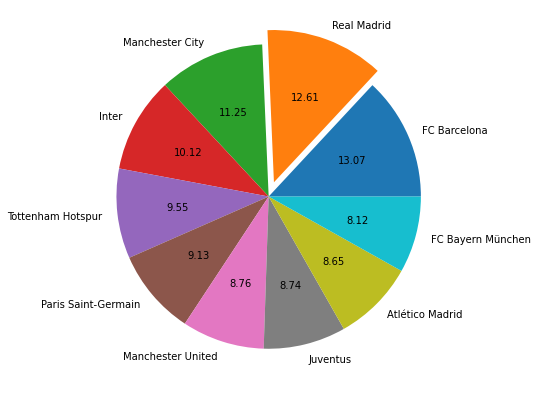

In [79]:
q1 = df.groupBy('Club').agg(sum('Value').alias('Total_Value')).orderBy('Total_Value',ascending=False).limit(10)
club_list = [row['Club'] for row in q1.collect()]
value_list = [row['Total_Value'] for row in q1.collect()]

## pie chart
plt.figure(figsize=(7,7))
plt.pie(value_list,labels=club_list,explode=[0,0.1,0,0,0,0,0,0,0,0],autopct='%0.2f')
plt.show()

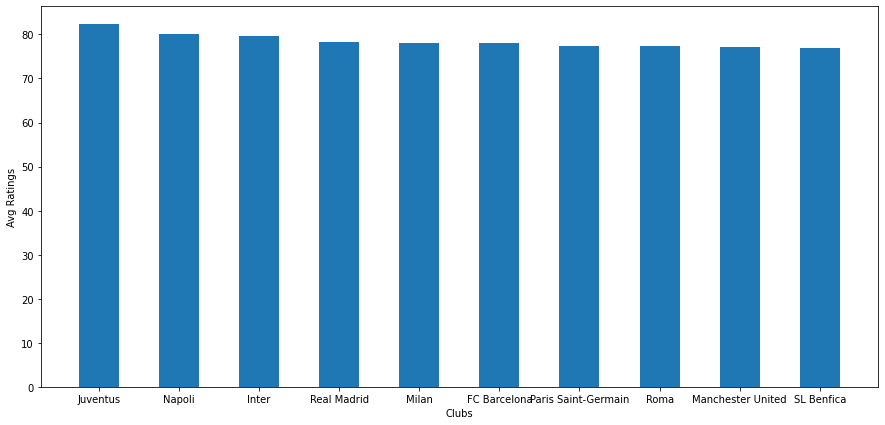

In [84]:
q2 = df.groupBy('Club').agg(avg('Overall').alias('Overall')).orderBy('Overall',ascending=False).limit(10)
club_list = [row['Club'] for row in q2.collect()]
overall_list = [row['Overall'] for row in q2.collect()]

## bar plot
plt.figure(figsize=(15,7))
plt.xlabel('Clubs')
plt.ylabel('Avg Ratings')
plt.bar(club_list,overall_list,width=0.5)
plt.show()

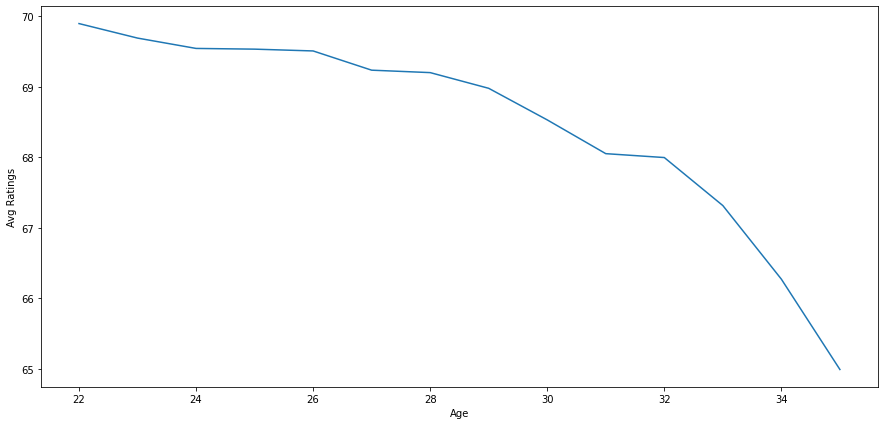

In [101]:
q3 = df.groupBy('Age').agg(avg('Overall').alias('Overall')).filter("age >= 22 and age<=35").orderBy('Overall',ascending=False)
age_list = sorted([row['Age'] for row in q3.collect()])
overall_list = [row['Overall'] for row in q3.collect()]


#lineplot
plt.figure(figsize=(15,7))
plt.xlabel('Age')
plt.ylabel('Avg Ratings')
plt.plot(age_list,overall_list)
plt.show()

## aggregate functions

In [36]:
import pyspark.sql.functions as f

In [39]:
club_list_duplicates = df.select(f.collect_list("Club")).collect()[0][0]
club_list_distinct = df.select(f.collect_set("Club")).collect()[0][0]

In [192]:
print(dir(f))

['Column', 'DataFrame', 'DataType', 'PandasUDFType', 'PythonEvalType', 'SparkContext', 'StringType', 'UserDefinedFunction', '__builtins__', '__cached__', '__doc__', '__file__', '__loader__', '__name__', '__package__', '__spec__', '_create_column_from_literal', '_create_lambda', '_create_udf', '_get_get_jvm_function', '_get_lambda_parameters', '_invoke_binary_math_function', '_invoke_function', '_invoke_function_over_column', '_invoke_higher_order_function', '_options_to_str', '_test', '_to_java_column', '_to_seq', '_unresolved_named_lambda_variable', 'abs', 'acos', 'acosh', 'add_months', 'aggregate', 'approxCountDistinct', 'approx_count_distinct', 'array', 'array_contains', 'array_distinct', 'array_except', 'array_intersect', 'array_join', 'array_max', 'array_min', 'array_position', 'array_remove', 'array_repeat', 'array_sort', 'array_union', 'arrays_overlap', 'arrays_zip', 'asc', 'asc_nulls_first', 'asc_nulls_last', 'ascii', 'asin', 'asinh', 'assert_true', 'atan', 'atan2', 'atanh', 'a

In [40]:
df.select(f.avg("Value")).collect()[0][0]   #max,min,mean,sum

In [42]:
df.select(f.first("Name")).show()           # first and last

+-----------+
|first(Name)|
+-----------+
|   D. Musto|
+-----------+



In [43]:
new_df = df.select('Name',f.expr("Name || '-' || Age").alias("Name-Age"))         #expr()

In [44]:
new_df.select('Name','Name-Age',f.lit("Footballer").alias("Profession")).show(2)             #lit()

+-----------+--------------+----------+
|       Name|      Name-Age|Profession|
+-----------+--------------+----------+
|F. Al Habib|F. Al Habib-20|Footballer|
| Ibai Gómez| Ibai Gómez-28|Footballer|
+-----------+--------------+----------+
only showing top 2 rows



In [46]:
data = [(1,"20200828"),(2,"20180525")]
columns=["id","date"]
dataF = spark.createDataFrame(data,columns)
dataF = dataF.withColumn('year', f.substring('date', 1,4)).withColumn('month', f.substring('date', 5,2)).withColumn('day', f.substring('date', 7,2))
dataF.printSchema()
dataF.show(truncate=False)

root
 |-- id: long (nullable = true)
 |-- date: string (nullable = true)
 |-- year: string (nullable = true)
 |-- month: string (nullable = true)
 |-- day: string (nullable = true)

+---+--------+----+-----+---+
|id |date    |year|month|day|
+---+--------+----+-----+---+
|1  |20200828|2020|08   |28 |
|2  |20180525|2018|05   |25 |
+---+--------+----+-----+---+



In [74]:
# TRANSLATE FUNCTION
address = [(1,"14851 Jeffrey Rd","DE"),
    (2,"43421 Margarita St","NY"),
    (3,"13111 Siemon Ave","CA")]
df = spark.createDataFrame(address,["id","address","state"])

df.withColumn('address', f.translate('address', '123J', 'ABCl')).show(truncate=False)

+---+------------------+-----+
|id |address           |state|
+---+------------------+-----+
|1  |A485A leffrey Rd  |DE   |
|2  |4C4BA Margarita St|NY   |
|3  |ACAAA Siemon Ave  |CA   |
+---+------------------+-----+



In [48]:
# OVERLAY FUNCTION
dfSample = spark.createDataFrame([("ABCDE_XYZ", "FGH")], ("col1", "col2"))
dfSample.select("col1","col2",f.overlay("col1", "col2", 7).alias("overlayed")).show()

+---------+----+---------+
|     col1|col2|overlayed|
+---------+----+---------+
|ABCDE_XYZ| FGH|ABCDE_FGH|
+---------+----+---------+



In [83]:
# ARRAY FUNCTION

df.select('id',f.array(df.address,df.state).alias("Address_State")).show()

+---+--------------------+
| id|       Address_State|
+---+--------------------+
|  1|[14851 Jeffrey Rd...|
|  2|[43421 Margarita ...|
|  3|[13111 Siemon Ave...|
+---+--------------------+



In [57]:
summary = df.describe()  #rounding

summary.select("summary",f.format_number(col("Overall").cast('float'),3).alias("Rounded column")).show()

+-------+--------------+
|summary|Rounded column|
+-------+--------------+
|  count|    18,207.000|
|   mean|        66.239|
| stddev|         6.909|
|    min|        46.000|
|    max|        94.000|
+-------+--------------+



## sampling

In [42]:
df.sample(0.1).show(10)

+------+------------+---+-------------+-------+--------------------+----------+------------+
|    ID|        Name|Age|  Nationality|Overall|                Club|     Value|      Joined|
+------+------------+---+-------------+-------+--------------------+----------+------------+
|205965|S. Ristovski| 26|FYR Macedonia|     76|         Sporting CP| 750000000| Aug 8, 2017|
|212188|   T. Werner| 22|      Germany|     83|          RB Leipzig|3450000000| Jul 1, 2016|
|226370| André Horta| 21|     Portugal|     74|      Los Angeles FC|  80000000|Jul 10, 2018|
|213777|   I. Fossum| 21|       Norway|     73|         Hannover 96| 550000000| Jan 1, 2016|
|149258|   A. Cordaz| 35|        Italy|     72|             Crotone|    725000| Jul 9, 2015|
|225100|    J. Gomez| 21|      England|     78|           Liverpool|1450000000|Jun 20, 2015|
|230758|    M. Pučko| 24|     Slovenia|     67|       Korona Kielce|  10000000|Aug 14, 2018|
|216283|      Danilo| 26|       Brazil|     72|     VfL Bochum 1848|  

## Saving Dataframe

In [27]:
df.write.parquet('./just_parquet',mode='overwrite',partitionBy="Club")

In [26]:
df.write.parquet('./just_parquet_wopart',mode='overwrite')

In [66]:
df.write.csv('./just_csv',mode='overwrite',sep=',',header=True)

In [67]:
df = df.repartition(1)
df.select('Name').write.mode('overwrite').text('./just_text')

## temporary views

In [49]:
df.createOrReplaceTempView('stats')

22/03/21 12:26:39 WARN package: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


In [50]:
spark.sql('select * from stats limit 10').show()

+------+--------------+---+--------------+-------+--------------------+-----+------------+
|    ID|          Name|Age|   Nationality|Overall|                Club|Value|      Joined|
+------+--------------+---+--------------+-------+--------------------+-----+------------+
|235535|     R. Lovett| 21|       England|     54|     Cheltenham Town| €90K| Aug 3, 2015|
|243907|      D. Koita| 18|        France|     68|En Avant de Guingamp|€1.3M| Jul 1, 2018|
|240334|     Z. Medley| 17|       England|     60|             Arsenal|€375K| Aug 2, 2017|
|187924|    C. Grenier| 27|        France|     77|    Stade Rennais FC| €10M|Jul 24, 2018|
|163135|     M. Tørnes| 32|       Denmark|     63|       Vendsyssel FF|€210K|Aug 31, 2018|
|219743|  S. Al Duayyi| 25|  Saudi Arabia|     65|            Al Fateh|€550K|Aug 23, 2018|
|246327|N. van den Dam| 19|   Netherlands|     54|       De Graafschap|€120K| Nov 3, 2018|
|215556|  E. Fernandes| 22|   Switzerland|     71|          Fiorentina|€3.5M|        null|

In [43]:
spark.sql('select * from parquet.`./just_parquet` limit 10').show(10)
spark.sql('select * from csv.`./just_text` limit 10').show(10)

+------+------------+---+------------+-------+-----+------+----+
|    ID|        Name|Age| Nationality|Overall|Value|Joined|Club|
+------+------------+---+------------+-------+-----+------+----+
|156092|   J. Villar| 41|    Paraguay|     77|    0|  null|null|
|207554| V. Claesson| 26|      Sweden|     75|    0|  null|null|
|207439|  L. Paredes| 24|   Argentina|     80|    0|  null|null|
|166851|  K. Árnason| 35|     Iceland|     70|    0|  null|null|
|220246|B. Mkhwanazi| 28|South Africa|     69|    0|  null|null|
|229585|  M. Degenek| 24|   Australia|     73|    0|  null|null|
|222226| V. Bozhikov| 30|    Bulgaria|     68|    0|  null|null|
|223058|  D. Kuzyaev| 25|      Russia|     77|    0|  null|null|
|182579|  V. Cáceres| 33|    Paraguay|     75|    0|  null|null|
|246386|   B. Méndez| 18|     Uruguay|     72|    0|  null|null|
+------+------------+---+------------+-------+-----+------+----+

+-----------------+
|              _c0|
+-----------------+
|         L. Messi|
|Cristian

In [53]:
df.createOrReplaceTempView('new_view')
reloaded_table = spark.table('new_view')
reloaded_table.show(2)
reloaded_table.sort('Age',ascending=False).show(10)
print(type(reloaded_table))

+------+---------+---+-----------+-------+--------------------+-----+-----------+
|    ID|     Name|Age|Nationality|Overall|                Club|Value|     Joined|
+------+---------+---+-----------+-------+--------------------+-----+-----------+
|235535|R. Lovett| 21|    England|     54|     Cheltenham Town| €90K|Aug 3, 2015|
|243907| D. Koita| 18|     France|     68|En Avant de Guingamp|€1.3M|Jul 1, 2018|
+------+---------+---+-----------+-------+--------------------+-----+-----------+
only showing top 2 rows

+------+---------------+---+-----------------+-------+--------------------+-----+------------+
|    ID|           Name|Age|      Nationality|Overall|                Club|Value|      Joined|
+------+---------------+---+-----------------+-------+--------------------+-----+------------+
|140029|       O. Pérez| 45|           Mexico|     71|             Pachuca|€160K| Jun 1, 1991|
| 51963|      T. Warner| 44|Trinidad & Tobago|     53|  Accrington Stanley|   €0| Aug 3, 2018|
| 53748|

In [52]:
spark.catalog.listTables('default')

[Table(name='new_view', database=None, description=None, tableType='TEMPORARY', isTemporary=True),
 Table(name='stats', database=None, description=None, tableType='TEMPORARY', isTemporary=True)]

In [107]:
spark.sql('drop table modified_table')

DataFrame[]

In [109]:
#persistent table

df.write.option('path','./tables').saveAsTable('modified_table')

In [110]:
spark.sql('select * from parquet.`./tables`').show(5)

+------+-----------+---+-----------+-------+-------------------+---------+--------------+
|    ID|       Name|Age|Nationality|Overall|               Club|    Value|Preferred_foot|
+------+-----------+---+-----------+-------+-------------------+---------+--------------+
|192255|P. Maiorino| 29|      Italy|     62|            Livorno|   300000|         Right|
|210556| Lucas João| 24|   Portugal|     69|Sheffield Wednesday|140000000|         Right|
|208158| F. Andrada| 24|  Argentina|     69|  Unión de Santa Fe|150000000|         Right|
|238468|    C. Mesa| 20|   Colombia|     50|    América de Cali|    60000|         Right|
|234178|   L. Abram| 22|       Peru|     70|    Vélez Sarsfield|240000000|          Left|
+------+-----------+---+-----------+-------+-------------------+---------+--------------+
only showing top 5 rows



In [111]:
spark.sql('select * from modified_table limit 10').show(5)

+---+----+---+-----------+-------+----+-----+--------------+
| ID|Name|Age|Nationality|Overall|Club|Value|Preferred_foot|
+---+----+---+-----------+-------+----+-----+--------------+
+---+----+---+-----------+-------+----+-----+--------------+



22/03/11 13:44:31 WARN HadoopFSUtils: The directory file:/home/shashank/Practice/spark-warehouse/tables was not found. Was it deleted very recently?


# JOINS

In [48]:
emp = [(1,"Smith",-1,"2018","10","M",3000),
    (2,"Rose",1,"2010","20","M",4000),
    (3,"Williams",1,"2010","10","M",1000),
    (4,"Jones",2,"2005","10","F",2000),
    (5,"Brown",2,"2010","40","",-1),
      (6,"Brown",2,"2010","50","",-1)
  ]
empColumns = ["emp_id","name","superior_emp_id","year_joined",
       "emp_dept_id","gender","salary"]

empDF = spark.createDataFrame(data=emp, schema = empColumns)
empDF.printSchema()
empDF.show(truncate=False)

dept = [("Finance",10),
    ("Marketing",20),
    ("Sales",30),
    ("IT",40)]

deptColumns = ["dept_name","dept_id"]
deptDF = spark.createDataFrame(data=dept, schema = deptColumns)
deptDF.printSchema()
deptDF.show(truncate=False)

root
 |-- emp_id: long (nullable = true)
 |-- name: string (nullable = true)
 |-- superior_emp_id: long (nullable = true)
 |-- year_joined: string (nullable = true)
 |-- emp_dept_id: string (nullable = true)
 |-- gender: string (nullable = true)
 |-- salary: long (nullable = true)

+------+--------+---------------+-----------+-----------+------+------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|
+------+--------+---------------+-----------+-----------+------+------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |
|2     |Rose    |1              |2010       |20         |M     |4000  |
|3     |Williams|1              |2010       |10         |M     |1000  |
|4     |Jones   |2              |2005       |10         |F     |2000  |
|5     |Brown   |2              |2010       |40         |      |-1    |
|6     |Brown   |2              |2010       |50         |      |-1    |
+------+--------+---------------+-----------+-----------+------+-----

In [120]:
empDF.join(deptDF,empDF.emp_dept_id ==  deptDF.dept_id,"inner").select('emp_id','name','dept_name').show()

+------+--------+---------+
|emp_id|    name|dept_name|
+------+--------+---------+
|     1|   Smith|  Finance|
|     3|Williams|  Finance|
|     4|   Jones|  Finance|
|     2|    Rose|Marketing|
|     5|   Brown|       IT|
+------+--------+---------+



In [ ]:
#joins "inner","left","right","full"

In [122]:
empDF.createOrReplaceTempView("EMP")
deptDF.createOrReplaceTempView("DEPT")

In [124]:
joinDF2 = spark.sql("select * from EMP e INNER JOIN DEPT d ON e.emp_dept_id == d.dept_id").show(truncate=False)

+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|emp_id|name    |superior_emp_id|year_joined|emp_dept_id|gender|salary|dept_name|dept_id|
+------+--------+---------------+-----------+-----------+------+------+---------+-------+
|1     |Smith   |-1             |2018       |10         |M     |3000  |Finance  |10     |
|3     |Williams|1              |2010       |10         |M     |1000  |Finance  |10     |
|4     |Jones   |2              |2005       |10         |F     |2000  |Finance  |10     |
|2     |Rose    |1              |2010       |20         |M     |4000  |Marketing|20     |
|5     |Brown   |2              |2010       |40         |      |-1    |IT       |40     |
+------+--------+---------------+-----------+-----------+------+------+---------+-------+



## Union

In [127]:
simpleData = [("James","Sales","NY",90000,34,10000),
    ("Michael","Sales","NY",86000,56,20000), 
    ("Robert","Sales","CA",81000,30,23000), 
    ("Maria","Finance","CA",90000,24,23000) 
  ]

columns= ["employee_name","department","state","salary","age","bonus"]

simpleData2 = [("James","Sales","NY",90000,34,10000),
    ("Maria","Finance","CA",90000,24,23000),
    ("Jen","Finance","NY",79000,53,15000),
    ("Jeff","Marketing","CA",80000,25,18000),
    ("Kumar","Marketing","NY",91000,50,21000)
  ]

df1 = spark.createDataFrame(simpleData,schema=columns)
df2 = spark.createDataFrame(simpleData2,schema=columns)

union_df = df1.union(df2).show()

+-------------+----------+-----+------+---+-----+
|employee_name|department|state|salary|age|bonus|
+-------------+----------+-----+------+---+-----+
|        James|     Sales|   NY| 90000| 34|10000|
|      Michael|     Sales|   NY| 86000| 56|20000|
|       Robert|     Sales|   CA| 81000| 30|23000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|        James|     Sales|   NY| 90000| 34|10000|
|        Maria|   Finance|   CA| 90000| 24|23000|
|          Jen|   Finance|   NY| 79000| 53|15000|
|         Jeff| Marketing|   CA| 80000| 25|18000|
|        Kumar| Marketing|   NY| 91000| 50|21000|
+-------------+----------+-----+------+---+-----+



In [128]:
#unionByNames --> used to merge columns by names instead of positions

In [137]:
data = ["Project Gutenberg’s",
        "Alice’s Adventures in Wonderland",
        "Project Gutenberg’s",
        "Adventures in Wonderland",
        "Project Gutenberg’s"]

rdd=spark.sparkContext.parallelize(data)
rdd2=rdd.flatMap(lambda x: x.split(" "))

for element in rdd2.collect():
    print(element)
    


Project
Gutenberg’s
Alice’s
Adventures
in
Wonderland
Project
Gutenberg’s
Adventures
in
Wonderland
Project
Gutenberg’s


## datetime

In [79]:
df = df.select("*").limit(5)

In [80]:
df.show()

+------+------------+---+-------------+-------+-------------+---------+-----------+
|    ID|        Name|Age|  Nationality|Overall|         Club|    Value|     Joined|
+------+------------+---+-------------+-------+-------------+---------+-----------+
|205965|S. Ristovski| 26|FYR Macedonia|     76|  Sporting CP|750000000|Aug 8, 2017|
|227557|M. Cassierra| 21|     Colombia|     70| FC Groningen|270000000|       null|
|236639|        Xeka| 23|     Portugal|     73|   LOSC Lille|470000000|Jul 1, 2017|
|131444|    R. Würtz| 34|      Denmark|     68|   Aalborg BK|   425000|Jul 9, 2009|
|190467|  D. de Buen| 26|       Mexico|     70|Santos Laguna|180000000|Jan 1, 2016|
+------+------------+---+-------------+-------+-------------+---------+-----------+



In [82]:
df.select(f.current_date()).show(1)    #current date

+--------------+
|current_date()|
+--------------+
|    2022-03-14|
+--------------+
only showing top 1 row



In [106]:
df.select(f.to_date(col("Joined"),"mm dd, yyyy")).show()

+-------------------------+
|to_date(Joined, m d yyyy)|
+-------------------------+
|                     null|
|                     null|
|                     null|
|                     null|
|                     null|
+-------------------------+



In [117]:
data=[["1","2020-02-01"],["2","2019-03-01"],["3","2021-03-01"]]
df=spark.createDataFrame(data,["id","input"])
df.show(5)

+---+----------+
| id|     input|
+---+----------+
|  1|2020-02-01|
|  2|2019-03-01|
|  3|2021-03-01|
+---+----------+



In [119]:
df = df.withColumn("input",df.input.cast(DateType()))
df.printSchema()

root
 |-- id: string (nullable = true)
 |-- input: date (nullable = true)



In [122]:
df.select(f.current_timestamp()).show()

+--------------------+
| current_timestamp()|
+--------------------+
|2022-03-14 16:49:...|
|2022-03-14 16:49:...|
|2022-03-14 16:49:...|
+--------------------+



In [130]:
df.select(col("input"),f.date_format(col("input"), "MM-dd-yyyy").alias("date_format")).show() #changing format

+----------+-----------+
|     input|date_format|
+----------+-----------+
|2020-02-01| 02-01-2020|
|2019-03-01| 03-01-2019|
|2021-03-01| 03-01-2021|
+----------+-----------+



In [133]:
df.select(f.datediff(f.current_date(),col("input"))).show()   #difference in date #month_between()

+-------------------------------+
|datediff(current_date(), input)|
+-------------------------------+
|                            772|
|                           1109|
|                            378|
+-------------------------------+



In [135]:
df.select(col("input"), 
    f.add_months(col("input"),3).alias("add_months"), 
    f.add_months(col("input"),-3).alias("sub_months"), 
    f.date_add(col("input"),4).alias("date_add"), 
    f.date_sub(col("input"),4).alias("date_sub") 
  ).show()

+----------+----------+----------+----------+----------+
|     input|add_months|sub_months|  date_add|  date_sub|
+----------+----------+----------+----------+----------+
|2020-02-01|2020-05-01|2019-11-01|2020-02-05|2020-01-28|
|2019-03-01|2019-06-01|2018-12-01|2019-03-05|2019-02-25|
|2021-03-01|2021-06-01|2020-12-01|2021-03-05|2021-02-25|
+----------+----------+----------+----------+----------+



In [136]:
df.select(col("input"), 
     f.year(col("input")).alias("year"), 
     f.month(col("input")).alias("month"), 
     f.next_day(col("input"),"Sunday").alias("next_day"), 
     f.weekofyear(col("input")).alias("weekofyear")).show()

+----------+----+-----+----------+----------+
|     input|year|month|  next_day|weekofyear|
+----------+----+-----+----------+----------+
|2020-02-01|2020|    2|2020-02-02|         5|
|2019-03-01|2019|    3|2019-03-03|         9|
|2021-03-01|2021|    3|2021-03-07|         9|
+----------+----+-----+----------+----------+



## User defined functions

In [70]:
dfU = df.select("*").limit(10)

In [90]:
def convCase(s):
    result = ""
    for x in s.split(" "):
        result+=x[0].lower() + x[1:] + " "
    return result.strip()

p = convCase("Shashank Ajgaonkar")

In [91]:
""" Converting function to UDF """
convertUDF = f.udf(lambda z: convCase(z),StringType())

In [94]:
dfU.select("ID",convertUDF("Name").alias("Inverted name")).show()

+------+-----------------+
|    ID|    Inverted name|
+------+-----------------+
|158023|         l. messi|
| 20801|cristiano ronaldo|
|190871|        neymar jr|
|193080|           de gea|
|192985|     k. de bruyne|
|183277|        e. hazard|
|177003|        l. modrić|
|176580|        l. suárez|
|155862|     sergio ramos|
|200389|         j. oblak|
+------+-----------------+



In [96]:
""" Using UDF on SQL """
spark.udf.register("convertUDF", convCase,StringType())
dfU.createOrReplaceTempView("new_view")
spark.sql("select ID, convertUDF(Name) as name from new_view").show(truncate=False)


+------+-----------------+
|ID    |name             |
+------+-----------------+
|158023|l. messi         |
|20801 |cristiano ronaldo|
|190871|neymar jr        |
|193080|de gea           |
|192985|k. de bruyne     |
|183277|e. hazard        |
|177003|l. modrić        |
|176580|l. suárez        |
|155862|sergio ramos     |
|200389|j. oblak         |
+------+-----------------+



22/03/15 17:01:30 WARN SimpleFunctionRegistry: The function convertudf replaced a previously registered function.


## pivot

In [6]:
data = [("Banana",1000,"USA"), ("Carrots",1500,"USA"), ("Beans",1600,"USA"),
      ("Orange",2000,"USA"),("Orange",2000,"USA"),("Banana",400,"China"),
      ("Carrots",1200,"China"),("Beans",1500,"China"),("Orange",4000,"China"),
      ("Banana",2000,"Canada"),("Carrots",2000,"Canada"),("Beans",2000,"Mexico")]

columns= ["Product","Amount","Country"]
df = spark.createDataFrame(data = data, schema = columns)
df.show()

+-------+------+-------+
|Product|Amount|Country|
+-------+------+-------+
| Banana|  1000|    USA|
|Carrots|  1500|    USA|
|  Beans|  1600|    USA|
| Orange|  2000|    USA|
| Orange|  2000|    USA|
| Banana|   400|  China|
|Carrots|  1200|  China|
|  Beans|  1500|  China|
| Orange|  4000|  China|
| Banana|  2000| Canada|
|Carrots|  2000| Canada|
|  Beans|  2000| Mexico|
+-------+------+-------+



In [11]:
pivotDF = df.groupBy("Product").pivot("Country").sum("Amount")
pivotDF.show()

+-------+------+-----+------+----+
|Product|Canada|China|Mexico| USA|
+-------+------+-----+------+----+
| Orange|  null| 4000|  null|4000|
|  Beans|  null| 1500|  2000|1600|
| Banana|  2000|  400|  null|1000|
|Carrots|  2000| 1200|  null|1500|
+-------+------+-----+------+----+



In [14]:
df.groupBy("Product","Country").sum("Amount").show()

+-------+-------+-----------+
|Product|Country|sum(Amount)|
+-------+-------+-----------+
|Carrots|    USA|       1500|
| Banana|    USA|       1000|
|  Beans|    USA|       1600|
| Banana|  China|        400|
| Orange|    USA|       4000|
| Orange|  China|       4000|
|Carrots|  China|       1200|
|  Beans|  China|       1500|
|Carrots| Canada|       2000|
|  Beans| Mexico|       2000|
| Banana| Canada|       2000|
+-------+-------+-----------+

